In [50]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import time
%matplotlib inline
import scipy

Params 1.161601978906453 5.914634535366192 0.07012278445531239 Tmin 5.914650717419675 Tmax 7.073721751881291
Params 1.8909369321197564 6.065708195629725 0.3836676610415854 Tmin 6.0676509624344686 Tmax 7.403144085043692
Params 3.4710597311578972 5.703263936125595 0.2421481101161855 Tmin 5.705016700246473 Tmax 6.464369239834745
Params 1.6322065172800437 3.008093805415277 0.16022125618288402 Tmin 3.0086994103976714 Tmax 4.380453163977037
Params 0.580371869315876 2.9145571796954535 0.1531117134073131 Tmin 2.914557179695454 Tmax 4.7004457064600285


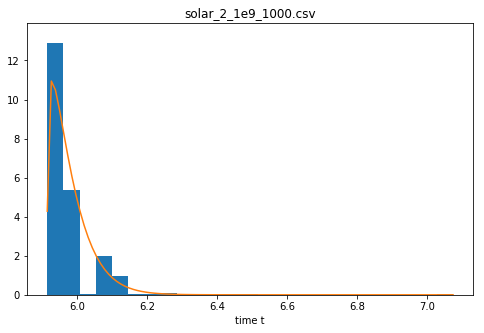

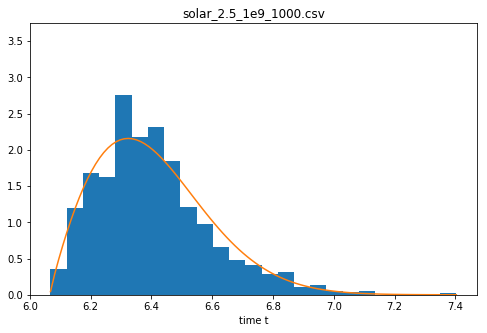

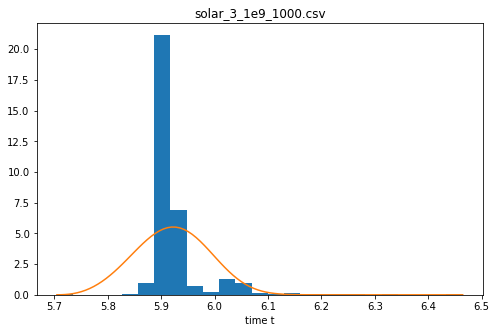

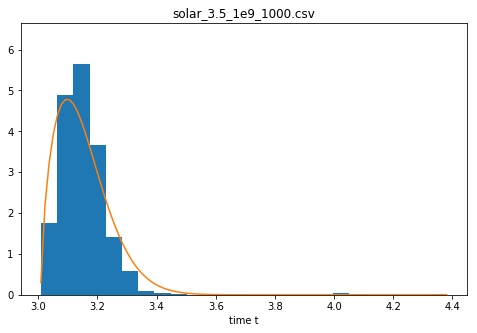

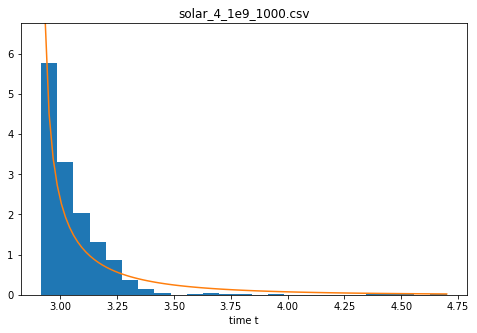

In [54]:
data = np.loadtxt("../../csvs/Solar_feats/Order.txt", dtype = str)
means = np.zeros(data.shape[0])
efac = np.zeros_like(means)
for i, name in enumerate(data):
    #print name
    times = pd.read_csv("../../csvs/Solar_feats/" + name, index_col=0)
    del times["Unnamed: 0.1"]
    times['t'] = times['t'] / 2./np.pi
    times['t'] = np.log10(times['t'])
    fig, ax = plt.subplots(1, figsize  = (8, 5))
    ax.set_title(name)
    ax.set_xlabel("time t")
    n, bins, patches =  ax.hist(times["t"], normed=1, bins = 25)
    
    #weibull hist fits
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(times['t'].values)#, f0=a_in,floc=loc_in)
    print "Params", gamma_out, loc_out, alpha_out, "Tmin", times["t"].min(), "Tmax", times["t"].max()#, f0=a_in,floc=loc_in)
    means[i] = loc_out + alpha_out*scipy.special.gamma(1.+1./gamma_out)
    #print loc_out, alpha_out*scipy.special.gamma(1.+1./gamma_out)
    efac[i] = float(name.split("_")[1])
    x = np.linspace(times["t"].min(), times["t"].max(), 100)
    
    weib_vals = stats.weibull_min.pdf(x, c=gamma_out,loc=loc_out,scale = alpha_out)
    
    ax.plot(x, weib_vals)
    max_val = n.max()
    ax.set_ylim([0,max_val +1])
    fig.savefig("../../Figures/Solar_Figures/Solar_efac{0}.png".format(efac[i]), bbox_inches = "tight")

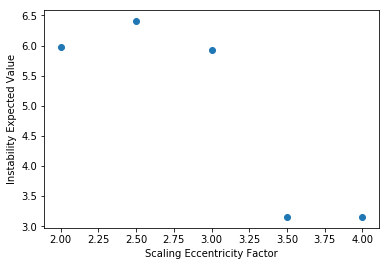

In [56]:
plt.scatter(efac, means)
plt.xlabel("Scaling Eccentricity Factor")
plt.ylabel("Instability Expected Value") 
#note this is not the loc parameter, though its a resonally decent apprximation
plt.savefig("../../Figures/Solar_Figures/EXP_val_vs_efac.png", bbox_inches = "tight")